# Problem Statement


**Company XYZ**, a credit card provider with approximately **1,000 customers** across the United States, manages users who may own one or more credit cards.  

The company aims to effectively **track and analyze transaction data** to gain insights into the following key metrics:

- **Total number of transactions**
- **Total transaction amount**
- **Total number of users**
- **Total number of fraudulent transactions**

In addition to monitoring these metrics, the company wants to **understand the characteristics of fraudulent transactions** and develop a **machine learning model** that can **identify or predict potential fraudulent activity** before it occurs.

# Business objective

The main business objectives of **Company XYZ** are as follows:

1. **Track Key Business Metrics (KPIs)**  
   - Monitor total number of transactions  
   - Track total transaction amount  
   - Measure total number of fraudulent transactions and the amount involved  
   - Maintain a record of the total user base  

2. **Understand Fraudulent Transaction Characteristics**  
   - Analyze the key patterns and characteristics of fraudulent transactions  
   - Use these insights to design preventive measures before fraud occurs  

3. **Develop a Machine Learning Model**  
   - Build a predictive model based on identified characteristics  
   - Explain and interpret results based on the observed data patterns  

4. **Monitor and Improve Model Performance**  
   - Track model accuracy and other performance metrics  
   - Fine-tune model parameters to achieve the most optimal results  

5. **Build an Interactive Dashboard**  
   - Visualize key business KPIs  
   - Display live transaction data and analytics overview  
   - Integrate real-time testing and model performance monitoring  


# Data Collection

## Data Source

The dataset used in this project is a **labeled synthetic dataset** obtained from **Kaggle**. It contains detailed information related to credit card transactions, including card and cardholder details such as **card number**, **age**, **location**, and **profession**. Additionally, it provides information about **merchants** (merchant name and location) and **transaction details** such as **transaction time**, **amount**, and **product category**.  

This dataset is **synthetic** and does not contain any real customer information.


Drive- link : https://docs.google.com/spreadsheets/d/1-QqekphbMiXTGOmCUPZcjhXke0w4oxZm/edit?usp=drive_link&ouid=110414053168903730701&rtpof=true&sd=true

Importing Libraries for data manipulation and loading data

In [2]:
import pandas as pd
import numpy as np
import requests

In [19]:
df=pd.read_csv("credit_card_transactions(original).csv")

In [21]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [25]:
df.shape

(1296675, 24)

There are 12,96,675 Records so far and 24 columns

Lets check for null values 

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

There is not any null values except for merch_zipcode which is not usefull since we have latitude and longitude of merchant 

# Data Cleaning And Feature Engineering

1. Drop the `Unnamed: 0` column since it is just an index.

In [29]:
df.drop("Unnamed: 0",axis=1,inplace=True)

2. Transform data to include a feature for distance between the cardholder and merchant.

In [30]:
# Function to calculate Haversine distance
def haversine(lat1, lon1, lat2, lon2):
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Radius of Earth in kilometers (use 3956 for miles)
    r = 6371
    return c * r

In [34]:
df['distance_km'] = haversine(df['lat'], df['long'], df['merch_lat'], df['merch_long']).round(2)

In [48]:
cols=['lat','long','merch_lat','merch_long']

In [49]:
df.drop(cols,axis=1,inplace=True)

3. Convert `trans_date_trans_time` column to datetime format for feature extraction.

In [37]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')

In [40]:
df['dob']=pd.to_datetime(df['dob'],errors='coerce')

In [95]:
df['YearMonth'] = df['trans_date_trans_time'].dt.to_period('M')

4. Drop `unix_time` as it has no direct relevance; transaction time is available.

In [42]:
df.drop('unix_time', axis=1,inplace=True)

5. Calculate the age of the cardholder from the `dob` column for fraud analytics.

In [43]:
df['age_at_transaction'] = (df['trans_date_trans_time'] - df['dob']).dt.days // 365

In [45]:
df.drop('dob',axis=1,inplace=True)

6. trans_num and merch_zipcode is column is not relevant as well

In [ ]:
df.drop(['trans_num','merch_zipcode'],axis=1,inplace=True)

7. Convert first name and last name as full name

In [55]:
df['full_name']=df['first'] + ' ' + df['last']

In [56]:
df = df.drop(['first', 'last'], axis=1)

8. merchant column rename to merchant_name

In [59]:
df.rename(columns={'merchant':'Merchant_name'},inplace=True)

9. make Card number More visible in string since it is in int data type

In [61]:
df['cc_num'] = df['cc_num'].astype(str)

In [64]:
df['cc_num'] = df['cc_num'].apply(lambda x: ' '.join([x[i:i+4] for i in range(0, len(x), 4)]))

10. Make amt column more readable

In [71]:
df.rename(columns={'amt':'Transaction_amount'},inplace=True)

In [73]:
df.rename(columns={'cc_num':'Credit_Card_number','category':'Category','gender':'Gender','street':'Street','state':'State','city':'City','zip':'Zipcode','city_pop':'City_Population','job':'Job','is_fraud':'Class','distance_km':'Distance(Km)','age_at_transaction':'Age','full_name':'Name'},inplace=True)

# Exploratory Data Analysis (EDA)

Data is ready to be analyzed 

In [96]:
Data=df

In [76]:
Data.describe()

,trans_date_trans_time,Transaction_amount,Zipcode,City_Population,Class,Distance(Km),Age
count,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,2019-10-03 12:47:28.070214144,7.035104e+01,4.880067e+04,8.882444e+04,5.788652e-03,7.611465e+01,4.552822e+01
min,2019-01-01 00:00:18,1.000000e+00,1.257000e+03,2.300000e+01,0.000000e+00,2.000000e-02,1.300000e+01
25%,2019-06-03 19:12:22.500000,9.650000e+00,2.623700e+04,7.430000e+02,0.000000e+00,5.533000e+01,3.200000e+01
50%,2019-10-03 07:35:47,4.752000e+01,4.817400e+04,2.456000e+03,0.000000e+00,7.823000e+01,4.400000e+01
75%,2020-01-28 15:02:55.500000,8.314000e+01,7.204200e+04,2.032800e+04,0.000000e+00,9.850000e+01,5.700000e+01
max,2020-06-21 12:13:37,2.894890e+04,9.978300e+04,2.906700e+06,1.000000e+00,1.521200e+02,9.500000e+01
std,NaN,1.603160e+02,2.689322e+04,3.019564e+05,7.586269e-02,2.911693e+01,1.740895e+01


**1. Transaction Date and Time (`trans_date_trans_time`)**  
- Range: From *2019-01-01* to *2020-06-21*  
- Mean timestamp: Around *2019-10-03 12:47:28*  
- The dataset spans approximately **1.5 years**, providing enough temporal coverage to analyze seasonal or time-based fraud patterns.

---

**2. Transaction Amount (`Transaction_amount`)**  
- Mean: \$70.35 | Median: \$47.52 | Range: \$1 – \$28,948.90  
- Most transactions are low to moderate in value, with a few large outliers.  
- **High or unusual amounts** may indicate potential fraudulent activity.

---

**3. Zipcode (`Zipcode`)**  
- Mean: ~48,800 | Range: 1,257 – 99,783  
- Transactions are spread widely across different locations, suggesting **geographic diversity** in the dataset.

---

**4. City Population (`City_Population`)**  
- Mean: 88,824 | Median: 2,456 | Range: 23 – 2,906,700  
- Customers come from both **small towns and large metropolitan areas**.  
- Fraud patterns may vary based on population density and location type.

---

**5. Class (`is_fraud`)**  
- Mean: 0.00579 → about **0.58% of transactions are fraudulent**.  
- The dataset is **highly imbalanced**, requiring techniques such as **SMOTE**, **class weighting**, or **anomaly detection** during model training.

---

**6. Distance (Km) (`Distance(Km)`)**  
- Mean: 76.11 km | Median: 78.23 km | Range: 0.02 – 152.12 km  
- On average, merchants are ~76 km away from cardholders.  
- **Large or very small distances** could indicate abnormal (potentially fraudulent) transactions.

---

**7. Age (`Age`)**  
- Mean: 45.5 years | Median: 44 years | Range: 13 – 95 years  
- Represents a broad customer base.  
- Fraud likelihood may vary across age groups due to different spending behaviors.


lets understand data distribution and corelation betweeen features and target variable

array([[<Axes: title={'center': 'trans_date_trans_time'}>,
        <Axes: title={'center': 'Transaction_amount'}>,
        <Axes: title={'center': 'Zipcode'}>],
       [<Axes: title={'center': 'City_Population'}>,
        <Axes: title={'center': 'Class'}>,
        <Axes: title={'center': 'Distance(Km)'}>],
       [<Axes: title={'center': 'Age'}>, <Axes: >, <Axes: >]],
      dtype=object)

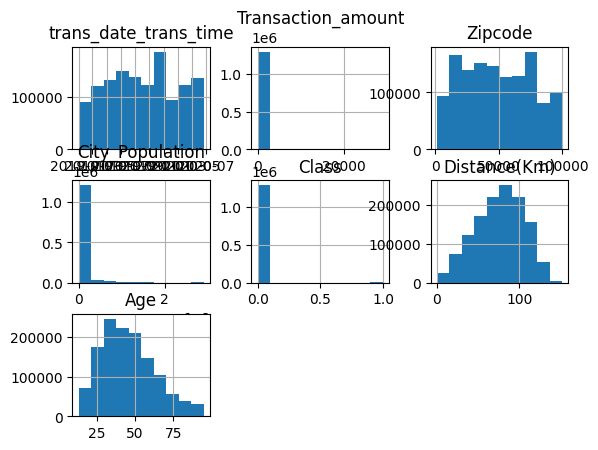

In [80]:
Data.hist()

The dataset shows a consistent spread of transactions over time. Transaction amounts are right-skewed, with most being small and few large outliers. Zipcodes and city populations indicate wide geographic coverage, with most users from smaller towns. The fraud class is highly imbalanced, confirming that fraudulent transactions are rare. Distance between cardholder and merchant is roughly normal around 70–80 km, while age is normally distributed around 40–45 years. Overall, the data is diverse and realistic, with skewed numeric features and a rare fraud class.

**Lets understand corelation between target variable and Feature variable**

In [87]:
Numeric_Columns=df.select_dtypes(include=['int64', 'float64'])

In [88]:
Correlation_matrix=Numeric_Columns.corr()

In [92]:
print("Correlation of features with target variable (Class): \n",Correlation_matrix['Class'].sort_values())

Correlation of features with target variable (Class): 
 Zipcode              -0.002162
Distance(Km)          0.000403
City_Population       0.002136
Age                   0.012244
Transaction_amount    0.219404
Class                 1.000000
Name: Class, dtype: float64


-> As we can see Transaction Amount and Age is major features and City_population ,Distance, and zpcode respectively

**Importing Librarie for Visualisation**

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

Correlation Matrix Between Features and Target Variable

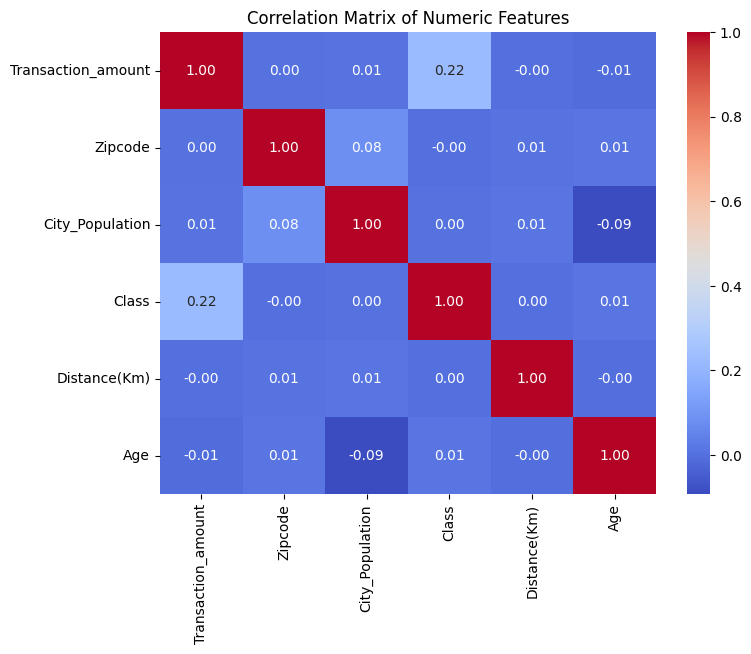

In [94]:
plt.figure(figsize=(8,6))
sns.heatmap(Correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# Feature Engineering

Based on Excel analysis, it was observed that a transaction is more likely to be fraudulent when a particular user’s average transaction amount for a month is unusually high compared to their normal spending behavior.
This indicates that fraud often coincides with spending spikes at the user level, where the monthly average exceeds the user’s typical range.
Such anomalies can be engineered as features for the machine learning model, helping it identify users whose transaction patterns deviate sharply from their usual behavior.

In [100]:
user_month_avg = (
    Data.groupby(['Credit_Card_number', 'YearMonth'])['Transaction_amount']
    .mean()
    .reset_index()
    .rename(columns={'Transaction_amount': 'User_Monthly_Avg'})
)
Data=Data.merge(user_month_avg,on=['Credit_Card_number', 'YearMonth'],how='left')

--> New column introduced which is User_monthly_average

In [102]:
user_overall_avg = (
    Data.groupby('Credit_Card_number')['Transaction_amount']
    .mean()
    .reset_index()
    .rename(columns={'Transaction_amount': 'User_Overall_Avg'})
)
Data=Data.merge(user_overall_avg,on='Credit_Card_number',how='left')

--> New column introduced which is User_overall_average

Now Lets Calcculate Monthly Deaviation from its overall Average 

In [104]:
Data['Monthly_Deviation']=Data['User_Monthly_Avg']-Data['User_Overall_Avg']

--> Also Date time of transaction do not contribute directly to model since its not continious data so we can extract few columns which makes sense such as hour of tansaction, day of month, day of week, if its weekend

In [167]:
Data['Transaction_Hour']=Data['trans_date_trans_time'].dt.hour
Data['Transaction_Day']=Data['trans_date_trans_time'].dt.day
Data['Transaction_Month']=Data['trans_date_trans_time'].dt.month
Data['Transaction_Weekday']=Data['trans_date_trans_time'].dt.dayofweek
Data['Is_Weekend']=(Data['Transaction_Weekday'] >= 5).astype(int)

In [169]:
Data.drop('trans_date_trans_time',axis=1,inplace=True)

In [170]:
Data.drop('Zipcode',axis=1,inplace=True)

In [179]:
numeric_cols = ['Transaction_Hour','Transaction_Day','Transaction_Month','Transaction_Weekday','Is_Weekend','User_Monthly_Avg','User_Overall_Avg','Monthly_Deviation','Class']

In [180]:
Corr_matrix=Data[numeric_cols].corr()

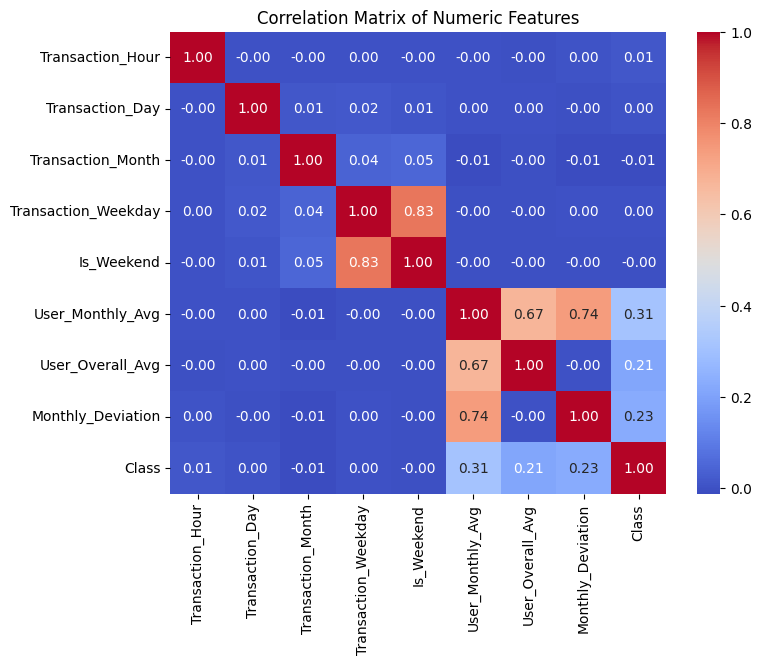

In [181]:
plt.figure(figsize=(8,6))
sns.heatmap(Corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

We can infer that if a user’s monthly average transaction amount is unusually high, it may indicate potential fraudulent activity. However, not every transaction within that high-spending month is necessarily fraudulent. Only those transactions where the monthly average is elevated and the individual transaction amount exceeds all other transactions within that month are more likely to be fraudulent.

--> we have also obeserved that Dataset is imbalanced so it need to be considered while test train split

# Dataset Preprocessing

In [134]:
Data['Gender'] = Data['Gender'].map({'M': 0, 'F': 1})

In [143]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

In [184]:
X=Data.drop('Class',axis=1)
Y=Data['Class']

Standardizing Numerical Features with StandardScaler

In [139]:
scaler=StandardScaler()
label=LabelEncoder()

--> Numeric Features should be converted to standard scale = ['Transaction_amount','City_Population','Distance(Km)','Age','User_Monthly_Avg','User_Overall_Avg,'Monthly_Deviation']

In [190]:
num_cols=X.select_dtypes(include=['number']).columns

In [191]:
X[num_cols]=scaler.fit_transform(X[num_cols])

Certain categorical features such as Merchant Name, Credit Card Number, City, State, and Category may provide valuable information for identifying fraudulent transactions.
However, other categorical fields like Street, Job, and Name are likely to introduce noise rather than add predictive power.
Therefore, we will remove these less relevant columns from the feature set to improve model performance.

In [197]:
X = X.drop(['Street', 'Job','Name'], axis=1)

In [205]:
X.drop('YearMonth', axis=1,inplace=True)

In [194]:
for col in ['Merchant_name', 'Credit_Card_number', 'City', 'State', 'Category']:
    X[col] = label.fit_transform(X[col])

Now, we will prepare the training and testing datasets while ensuring that the class distribution (fraudulent vs. non-fraudulent transactions) remains consistent across both sets.
This is achieved by performing a stratified split, which preserves the proportion of each class.

In [206]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=0.2,            # 20% test data
    random_state=42,          # reproducibility
    stratify=Y                # maintain fraud/non-fraud ratio
)

In [207]:
print("Training set class ratio:")
print(y_train.value_counts(normalize=True))
print("\nTest set class ratio:")
print(y_test.value_counts(normalize=True))

Training set class ratio:
Class
0    0.994211
1    0.005789
Name: proportion, dtype: float64

Test set class ratio:
Class
0    0.994212
1    0.005788
Name: proportion, dtype: float64


Now that the data has been cleaned, encoded, standardized, and properly split into training and testing sets while maintaining class balance, it is ready for model implementation.

# Model Implementation, Selection, and Performance Evaluation

To identify the most effective model for credit card fraud detection, we will experiment with four different algorithms — Decision Tree Classifier, Random Forest, XGBoost, and Logistic Regression.
Each model will be trained on the prepared dataset, and their performance will be evaluated using accuracy and other relevant metrics such as precision, recall, and F1-score.

In [201]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [202]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "XGBoost": XGBClassifier(random_state=42, scale_pos_weight=10, eval_metric='logloss'),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
}

In [203]:
results = {}

In [208]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob),
        "Report": classification_report(y_test, y_pred, output_dict=True)
    }

D:\anaconda3\envs\tf_env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [209]:
for name, metrics in results.items():
    print(f"\n✅ {name} Performance")
    print("----------------------------------")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"ROC-AUC: {metrics['ROC-AUC']:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, models[name].predict(X_test)))


✅ Decision Tree Performance
----------------------------------
Accuracy: 0.9985
ROC-AUC: 0.9327
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.87      0.87      0.87      1501

    accuracy                           1.00    259335
   macro avg       0.93      0.93      0.93    259335
weighted avg       1.00      1.00      1.00    259335


✅ Random Forest Performance
----------------------------------
Accuracy: 0.9988
ROC-AUC: 0.9973
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.98      0.81      0.89      1501

    accuracy                           1.00    259335
   macro avg       0.99      0.91      0.94    259335
weighted avg       1.00      1.00      1.00    259335


✅ XGBoost Performance
----------------------------------
Accuracy: 0.9992
ROC-AUC: 0.9998
Classification 

--> let's Create Visualisation for various models 

In [210]:
from sklearn.metrics import confusion_matrix

D:\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


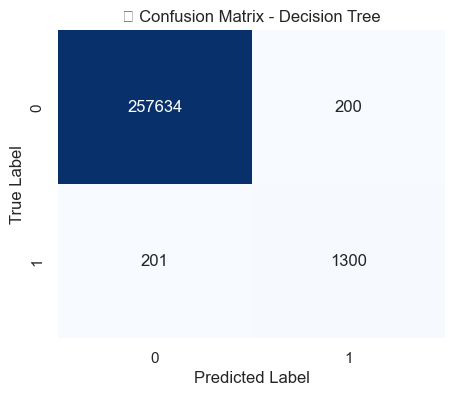

D:\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


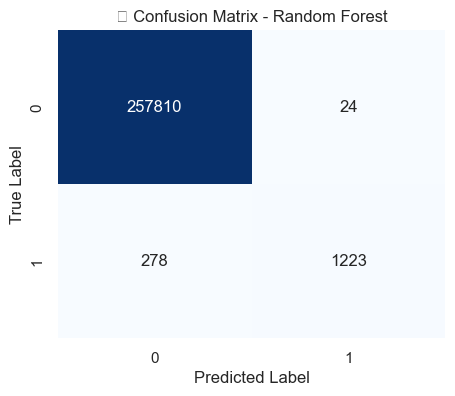

D:\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


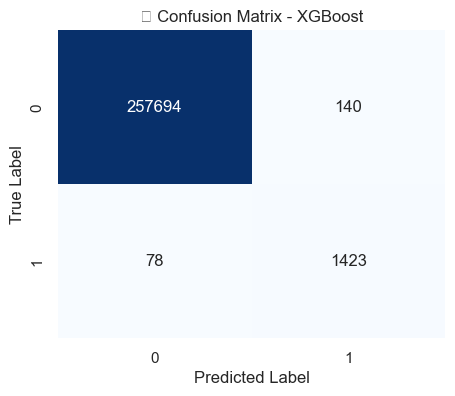

D:\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


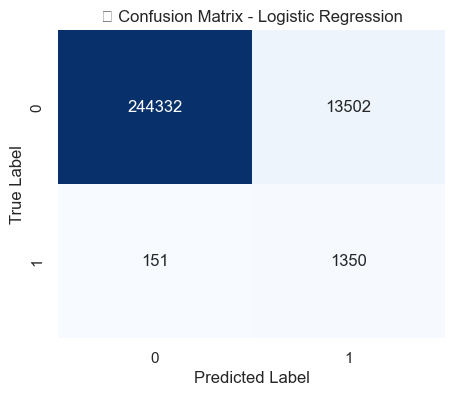

In [211]:
sns.set(style="whitegrid")
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"🔍 Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

Based on the evaluation results, XGBoost outperforms all other models, achieving an exceptional accuracy of 99.92% and a ROC-AUC of 0.9998.
It effectively detects fraudulent transactions with a precision of 0.91, recall of 0.95, and F1-score of 0.93, demonstrating both accuracy and reliability.
Overall, XGBoost proves to be the most suitable model for credit card fraud detection, offering strong performance in identifying rare fraud cases while minimizing false alarms.